In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import scipy.io as sio
from scipy.interpolate import griddata
import copy
from matplotlib.pyplot import figure
from termcolor import colored

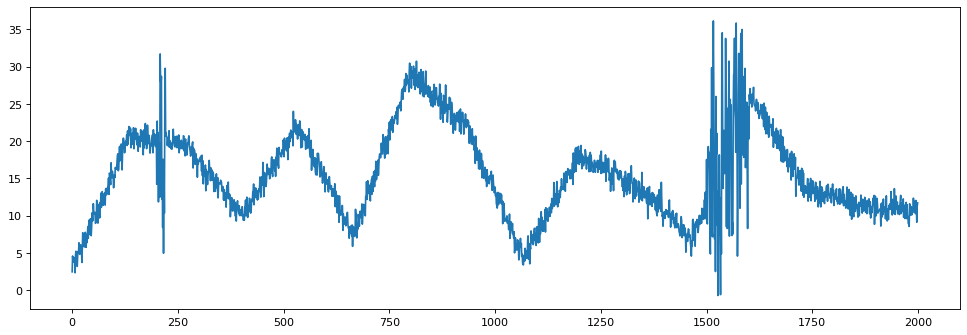

In [82]:
## generate signal with varying variability
n = 2000
p = 15  # poles for random interpolation

# amplitude modulator
signal1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
signal1 = signal1 + np.random.randn(n)


# add some high-amplitude noise
signal1[200:221]   = signal1[200:221] + np.random.randn(21)*9
signal1[1500:1601] = signal1[1500:1601] + np.random.randn(101)*9


# plot
figure(figsize=(15, 5), dpi=80)
plt.plot(signal1)
plt.show()


In [83]:
plot_list = []

# initialize RMS time series vector

for pct_win in range(1,20+1):
  # convert to indices
  k = int(n * (pct_win/2/100))

  rms_ts = np.zeros(n)

  for ti in range(0,n):
      
      # boundary points
      low_bnd = int( np.max((0,ti-k)) )
      upp_bnd = int( np.min((n,ti+k)) )
      
      # signal segment (and mean-center!)
      tmpsig = signal1[range(low_bnd,upp_bnd)]
      tmpsig = tmpsig - np.mean(tmpsig)
      
      # compute RMS in this window
      rms_ts[ti] = np.sqrt(np.sum( tmpsig**2 ))

  plot_list.append(rms_ts)

notes:
more and more data fall into 'outlier' range when the window size keep increasing
as their Root-mean-square value get affected by nearby outlier


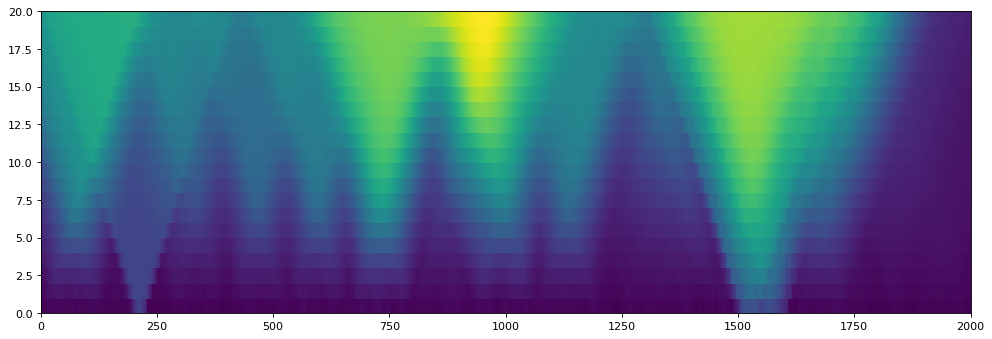

In [84]:
print(colored("notes:", "red"))
print(colored("more and more data fall into 'outlier' range when the window size keep increasing", "red"))
print(colored("as their Root-mean-square value get affected by nearby outlier", "red"))

figure(figsize=(15, 5), dpi=80)
plt.pcolormesh(plot_list)
plt.show()

